In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
taxif=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
from sklearn.model_selection import train_test_split


In [4]:
X = taxif[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff','no_of_passenger']]
y =taxif['amount']

In [5]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)



[ 17 126  26 ...  37  17  69]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.25, random_state=101)

In [7]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

In [8]:
sc = StandardScaler()
xtrain = sc.fit_transform(X_train)
xtest = sc.transform(X_test)

In [9]:
dtc = DecisionTreeClassifier()
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(xtrain,y_train)
ytest_pred=bag_model.predict(xtest)
print(bag_model.score(xtest, y_test))

0.07088


In [11]:
BaggingClassifier(dtc, n_estimators= 10 )

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

In [13]:
param_range = np.arange(1, 250, 5)

In [15]:
train_scores, test_scores = validation_curve(BaggingClassifier(),xtrain, y_train, param_name="n_estimators", 
                                             param_range=[  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246] , cv=5, scoring="accuracy", n_jobs=-1)

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [20]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

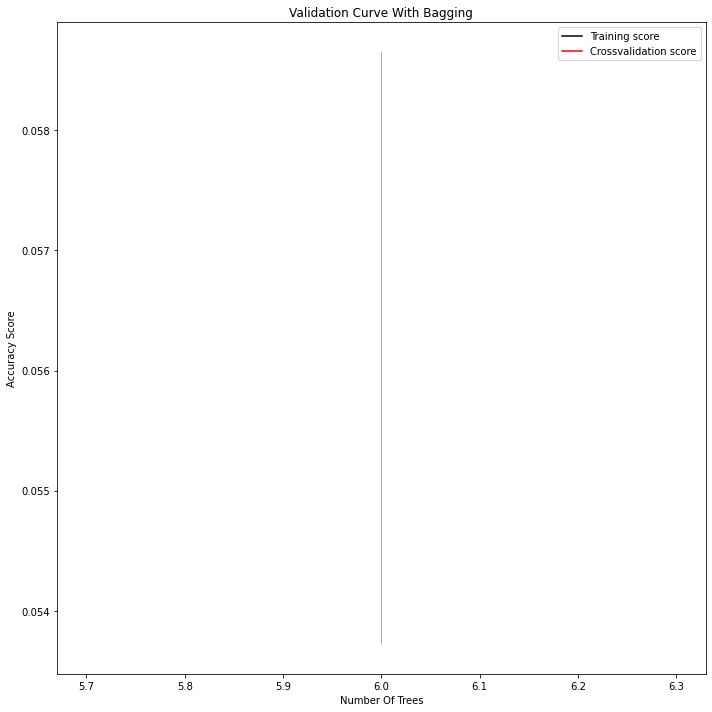

In [21]:
# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(10,10))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Crossvalidation score", color="red")
# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std,color="orange")
# Create plot
plt.title("Validation Curve With Bagging")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [22]:
BaggingClassifier(dtc, n_estimators=60)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=60)